# Preamble
 - Title: Covid 19 Infection and Deaths by State
 - Author: Lucas Nieddu
 - Contact Info: lnieddu@msudenver.edu
 -  Date: September 26th, 2021

# Introduction

 - This data explores the number of cases AND the number of deaths of each state due to Covid-19. The data will primarily focus on the percentage of people who died to the number of cases in each state. This data is as recent as the 25th of September of 2021.

# Dataset
  - Data Collected from the below source:
      - URL: https://usafacts.org/visualizations/coronavirus-covid-19-spread-map
  - The data set was collected using web scraping techniques to analyze the impact of COVID-19 by state. The source code where the data was scraped was organized in two parts with three columns. In order to validate the data, I checked the state websites to compare the data. It would be interesting to compare the state data to this websites data. Maybe another part of the project at a later date.
      - First Part: Number of Cases
          - column 1: "@type"
              - Description: The form of the statement (i.e the form of a "Question")
          - column 2: "name"
              - Description: The name of the state in question
          - column 3: "acceptedAnswer
              - Description: The number of cases in state
      - Second Part: Number of Deaths
          - column 1: "@type"
              - Description: The form of the statement (i.e the form of a "Question")
          - column 2: "name"
              - Description: The name of the state in question
          - column 3: "acceptedAnswer"
              - Description: The number of deaths in state
          
  - Tools/libraries used:
      - BeautifulSoup
      - json
      - requests
      - pandas
      - numpy
      - matplotlib
      - seaborn
      
  - Example source code from website(what was scraped):
      - "script data-react-helmet="true" type="application/ld+json">{"@context":"https://schema.org","@type":"FAQPage","mainEntity":[{"@type":"Question","name":"How many COVID-19 cases are there in Alabama state?","acceptedAnswer":{"@type":"Answer","text":784484}
     

## Data Collection Code

In [2]:
# CS390Z - Introduction to Data Minining - Fall 2021
# Instructor: Thyago Mota
# Description: data collection

# Web Scraping Tools
import requests
import json
from bs4 import BeautifulSoup

# General python data import libraries
import pandas as pd
import numpy as np

# Graphing libraries
import matplotlib.pyplot as plt
import seaborn as sns

# This is the URL where the data will be extracted
URL = 'https://usafacts.org/visualizations/coronavirus-covid-19-spread-map'

# Sending the request
page = requests.get(URL)

# Parsing the requested html information
soup = BeautifulSoup(page.content, "html.parser")

# Creating variable: @data that contains the data needed 
data = (soup.find_all("script",type="application/ld+json")[5])

# put the data into a json serialized object
json_object = json.loads(data.contents[0])

# refine the data needed to scrape
main = json_object['mainEntity']

# put the data into a dataframe using pandas
main_dataframe = pd.DataFrame(main)

# print the columns of the DataFrame
print(main_dataframe.columns)

Index(['@type', 'name', 'acceptedAnswer'], dtype='object')


# Data Cleaning by Column
### Column: "@type"

In [3]:
# CS390Z - Introduction to Data Minining - Fall 2021
# Instructor: Thyago Mota
# Description: Data Cleaning

# Column: @type
type = main_dataframe['@type']
print(type.head)

<bound method NDFrame.head of 0      Question
1      Question
2      Question
3      Question
4      Question
         ...   
199    Question
200    Question
201    Question
202    Question
203    Question
Name: @type, Length: 204, dtype: object>


### There is no need to keep any of the data in the "@type" column and this column will be droped from the dataframe

In [4]:
# CS390Z - Introduction to Data Minining - Fall 2021
# Instructor: Thyago Mota
# Description: Data Cleaning

main_dataframe.drop('@type', axis = 1, inplace = True)
print(main_dataframe.columns)

Index(['name', 'acceptedAnswer'], dtype='object')


### Column: "name"

In [5]:
# CS390Z - Introduction to Data Minining - Fall 2021
# Instructor: Thyago Mota
# Description: Data Cleaning

# Column: "name"

# Lets take a look at the columns name
infected = main_dataframe['name']
print(infected.head)

<bound method NDFrame.head of 0      How many COVID-19 cases are there in Alabama s...
1      How many COVID-19 cases are there in Alaska st...
2      How many COVID-19 cases are there in Arizona s...
3      How many COVID-19 cases are there in Arkansas ...
4      How many COVID-19 cases are there in Californi...
                             ...                        
199       How many Coronavirus deaths in Virginia state?
200     How many Coronavirus deaths in Washington state?
201    How many Coronavirus deaths in West Virginia s...
202      How many Coronavirus deaths in Wisconsin state?
203        How many Coronavirus deaths in Wyoming state?
Name: name, Length: 204, dtype: object>


 ### We do not need anything other than the name of the state. Also, there seems to be too many indexes in comparison to the amount of states in the United States. There should be 52 for "Cases" and 52 for "Deaths" equaling 104 rows and three columns. There is probably repeated data in the mix. 

In [6]:
# CS390Z - Introduction to Data Minining - Fall 2021
# Instructor: Thyago Mota
# Description: Data Cleaning

# A list of the words not needed
words = ["How", "many", "are", "there", "state", "?", "COVID-19", "Coronavirus", "in"]

# remove the words from the above list
for word in words:
    infected = infected.str.replace(word, "")
infected_df = pd.DataFrame(infected)

# Seperate Cases from Deaths by State
cases_df = infected_df[infected_df['name'].str.contains('cases')]
deaths_df = infected_df[infected_df['name'].str.contains('deaths')]
cases = cases_df["name"].str.replace("cases", "")
deaths = deaths_df["name"].str.replace("deaths", "")
final_cases_df = pd.DataFrame(cases)
final_deaths_df = pd.DataFrame(deaths)
print(final_cases_df.head)
print(final_deaths_df.head)

<bound method NDFrame.head of                     name
0               Alabama 
1                Alaska 
2               Arizona 
3              Arkansas 
4            California 
..                   ...
97               Virgia 
98             Washgton 
99          West Virgia 
100             Wiscons 
101               Wyomg 

[102 rows x 1 columns]>
<bound method NDFrame.head of                   name
102           Alabama 
103            Alaska 
104           Arizona 
105          Arkansas 
106        California 
..                 ...
199            Virgia 
200          Washgton 
201       West Virgia 
202           Wiscons 
203             Wyomg 

[102 rows x 1 columns]>


### Only one of the dataframes above is needed. The main goal is to extract the state name and to see if the dataset is even between deaths and cases by each state, which it is. Also, the "in" was a problem. It removed "in" from the entire dataset, including the States. Example: "Wyoming" is now spelled "Wyomg" - This is sloppy but it isn't a giant problem. Fix later. 

### Column: "acceptedAnswer"

In [7]:
# CS390Z - Introduction to Data Minining - Fall 2021
# Instructor: Thyago Mota
# Description: Data Cleaning

# acceptedAnswer
answer = main_dataframe['acceptedAnswer']
print(answer.head)

<bound method NDFrame.head of 0       {'@type': 'Answer', 'text': 784484}
1       {'@type': 'Answer', 'text': 100007}
2      {'@type': 'Answer', 'text': 1078875}
3       {'@type': 'Answer', 'text': 488740}
4      {'@type': 'Answer', 'text': 4448198}
                       ...                 
199      {'@type': 'Answer', 'text': 12511}
200       {'@type': 'Answer', 'text': 7494}
201       {'@type': 'Answer', 'text': 3523}
202       {'@type': 'Answer', 'text': 8794}
203        {'@type': 'Answer', 'text': 879}
Name: acceptedAnswer, Length: 204, dtype: object>


### This is pretty messy. The only element in this column needed is the integer at the end of each row.  

In [8]:
# CS390Z - Introduction to Data Minining - Fall 2021
# Instructor: Thyago Mota
# Description: Data Cleaning

# Column: acceptedAnswer
numbers = []
deaths = []
death_list = []
pd.DataFrame(answer)

# get rid of the noise in the row
for row in answer:
    number = str(row).replace("{'@type': 'Answer', 'text': ", "").replace("}", "")
    numbers.append(number)
numbers_df = pd.DataFrame(numbers)

#
state_cases = numbers_df.iloc[:102, :]
state_deaths = numbers_df.iloc[102:,:]
death_list = []
for row in state_deaths[0]:
    death_list.append(row)
death_list_df = pd.DataFrame(death_list)
print(death_list_df.head)

<bound method NDFrame.head of          0
0    13921
1      471
2    19737
3     7561
4    67859
..     ...
97   12511
98    7494
99    3523
100   8794
101    879

[102 rows x 1 columns]>


### Now that the data is in the format needed, lets put the data together into one dataframe and have a look

In [9]:
# CS390Z - Introduction to Data Minining - Fall 2021
# Instructor: Thyago Mota
# Description: Data Cleaning

# Combine all into one pandas dataframe 
df = pd.DataFrame({"State": final_cases_df["name"], "Cases": state_cases[0], "Deaths": death_list_df[0]})

### In order to see if there is repeated data, I will using the code below to view the entire dataset. Uncomment code to view dataset, but restart the kernal or re-set the pd.set_option(). 

In [10]:
# CS390Z - Introduction to Data Minining - Fall 2021
# Instructor: Thyago Mota
# Description: Data Cleaning

# pd.set_option("display.max_rows", None, "display.max_columns", None)
# pd.DataFrame(df)

### After reviewing the dataset, there is repeated code which starts at index 51. I will split the dataset at index 51

In [11]:
# CS390Z - Introduction to Data Minining - Fall 2021
# Instructor: Thyago Mota
# Description: Data Cleaning

# fix little problem with repeated data
final_df = df.iloc[:51, :]
final_df["Cases"] = final_df["Cases"].astype(int)
final_df["Deaths"] = final_df["Deaths"].astype(int)
pd.DataFrame(final_df)

<ipython-input-11-46098e228f20>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  final_df["Cases"] = final_df["Cases"].astype(int)
<ipython-input-11-46098e228f20>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  final_df["Deaths"] = final_df["Deaths"].astype(int)


,State,Cases,Deaths
0,Alabama,784484,13921
1,Alaska,100007,471
2,Arizona,1078875,19737
3,Arkansas,488740,7561
4,California,4448198,67859
5,Colorado,660884,7472
6,Connecticut,387733,8501
7,Delaw,130444,1942
8,District of Columbia,60205,1172
9,Florida,3542285,53580


# Feature Engineering
 ### A tiny bit of manipulating the data to create a new column called: "% of Deaths to Cases]. This is done by dividing the number of deaths by the number of cases. 
  - final_df["% of Deaths to Cases"] = (final_df["Deaths"].astype(int) / final_df["Cases"].astype(int)) * 100

In [12]:
# CS390Z - Introduction to Data Minining - Fall 2021
# Instructor: Thyago Mota
# Description: Feature Engineering

case_num = []
death_num = []

# used to create and compute the final column. 
final_df["% of Deaths to Cases"] = (final_df["Deaths"].astype(int) / final_df["Cases"].astype(int)) * 100
pd.DataFrame(final_df)

<ipython-input-12-e4c2b1ff4b6d>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  final_df["% of Deaths to Cases"] = (final_df["Deaths"].astype(int) / final_df["Cases"].astype(int)) * 100


,State,Cases,Deaths,% of Deaths to Cases
0,Alabama,784484,13921,1.774542
1,Alaska,100007,471,0.470967
2,Arizona,1078875,19737,1.829406
3,Arkansas,488740,7561,1.547039
4,California,4448198,67859,1.525539
5,Colorado,660884,7472,1.130607
6,Connecticut,387733,8501,2.192488
7,Delaw,130444,1942,1.488761
8,District of Columbia,60205,1172,1.946682
9,Florida,3542285,53580,1.512583


### The data is looking nice. I think it is safe to move on to summary statistics and data visualization with the data in the format it currently is in. 

# Summary Statistics 

In [13]:
# CS390Z - Introduction to Data Minining - Fall 2021
# Instructor: Thyago Mota
# Description: Summary Statistics

# Cases
print("Cases#################################################")
print("Mean: ",final_df["Cases"].mean())
print("Median: ", final_df["Cases"].median())
print("Standard Deviation: ",final_df["Cases"].std())
print("Records: ", len(final_df["Cases"]))
print("range: ", "[", final_df["Cases"].min(), ",", final_df["Cases"].max(), "]")
print("\n")

# Deaths
print("Deaths###############################################")
print("Mean: ", final_df["Deaths"].mean())
print("Median: ", final_df["Deaths"].median())
print("Standard Deviation: ", final_df["Deaths"].std())
print("Records: ", len(final_df["Deaths"]))
print("range: ", "[", final_df["Deaths"].min(), ",", final_df["Deaths"].max(), "]")
print("\n")

#Death percentage of cases
print("Percentage############################################")
final_df["% of Deaths to Cases"].mean()
print("Mean: ", final_df["% of Deaths to Cases"].mean())
print("Median: ", final_df["% of Deaths to Cases"].median())
print("Standard Deviation: ", final_df["% of Deaths to Cases"].std())
print("Records: ", len(final_df["% of Deaths to Cases"]))
print("range: ", "[", final_df["% of Deaths to Cases"].min(), ",", final_df["% of Deaths to Cases"].max(), "]")



Cases#################################################
Mean:  822677.4117647059
Median:  598072.0
Standard Deviation:  940690.8827466156
Records:  51
range:  [ 33031 , 4448198 ]


Deaths###############################################
Mean:  13350.529411764706
Median:  8492.0
Standard Deviation:  15810.052797322267
Records:  51
range:  [ 310 , 67859 ]


Percentage############################################
Mean:  1.5018812400406545
Median:  1.4871776782249815
Standard Deviation:  0.43158536336587044
Records:  51
range:  [ 0.47096703230773845 , 2.4723673841123626 ]


# Data Visualization

### The following is just a quick look at Colorado using a simple bar graph  

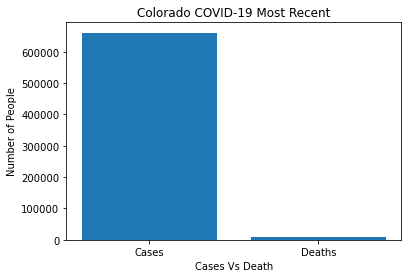

In [14]:
# CS390Z - Introduction to Data Minining - Fall 2021
# Instructor: Thyago Mota
# Description: Data Visualization

# For Fun: Quick look at Colorado 
x = ["Cases", "Deaths"]
colorado_data = [final_df["Cases"][5], final_df["Deaths"][5]]
y = [int(colorado_data[0]), int(colorado_data[1])]

plt.xlabel('Cases Vs Death')
plt.ylabel('Number of People')
plt.title("Colorado COVID-19 Most Recent")

plt.bar(x, y)
plt.show()

### Bar Graphs
- All 52 states are presented in the following bar graphs. The bar graphs show the percentage of deaths to number of cases. 

<BarContainer object of 6 artists>

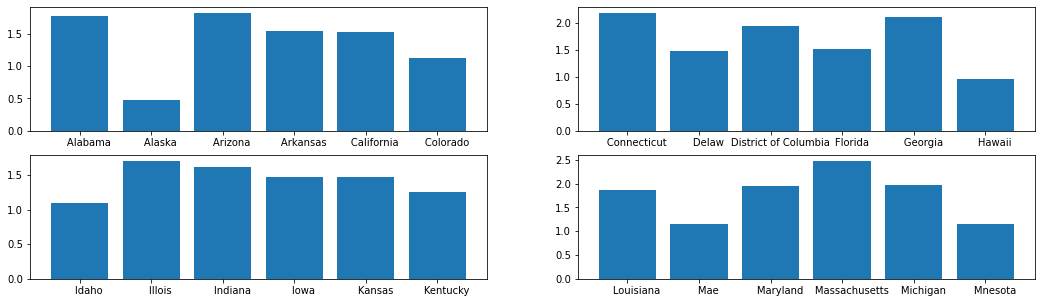

In [15]:
# CS390Z - Introduction to Data Minining - Fall 2021
# Instructor: Thyago Mota
# Description: Data Visualization

x1 = []
x2 = []
x3 = []
x4 = []

y1 = []
y2 = []
y3 = []
y4 = []

for i in range(6):
    x1.append(final_df["State"][i])
    y1.append(final_df["% of Deaths to Cases"][i])
    
for i in range(6, 12):
    x2.append(final_df["State"][i])
    y2.append(final_df["% of Deaths to Cases"][i])
    
for i in range(12, 18):
    x3.append(final_df["State"][i])
    y3.append(final_df["% of Deaths to Cases"][i])
    
for i in range(18, 24):
    x4.append(final_df["State"][i])
    y4.append(final_df["% of Deaths to Cases"][i])
fig, ax = plt.subplots(nrows=2, ncols=2, figsize=(18, 5))
ax[0,0].bar(x1, y1, label='a')
ax[0,1].bar(x2, y2, label='b')
ax[1,0].bar(x3, y3, label='c')
ax[1,1].bar(x4, y4, label='d')

<BarContainer object of 6 artists>

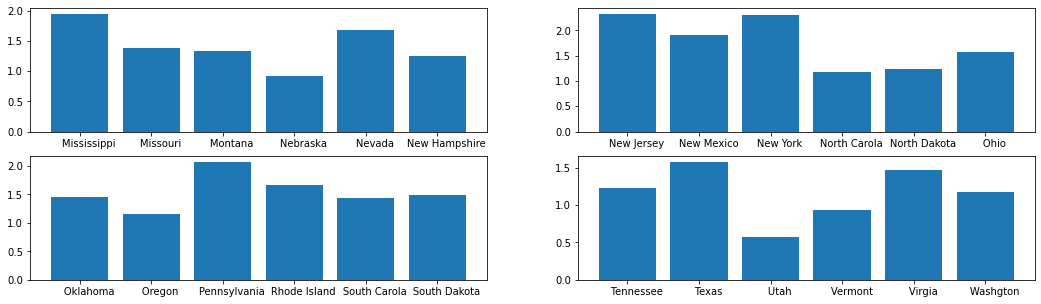

In [16]:
# CS390Z - Introduction to Data Minining - Fall 2021
# Instructor: Thyago Mota
# Description: Data Visualization

x5 = []
x6 = []
x7 = []
x8 = []

y5 = []
y6 = []
y7 = []
y8 = []

for i in range(24, 30):
    x5.append(final_df["State"][i])
    y5.append(final_df["% of Deaths to Cases"][i])
    
for i in range(30, 36):
    x6.append(final_df["State"][i])
    y6.append(final_df["% of Deaths to Cases"][i])
    
for i in range(36, 42):
    x7.append(final_df["State"][i])
    y7.append(final_df["% of Deaths to Cases"][i])
    
for i in range(42, 48):
    x8.append(final_df["State"][i])
    y8.append(final_df["% of Deaths to Cases"][i])
fig, ax = plt.subplots(nrows=2, ncols=2, figsize=(18, 5))
ax[0,0].bar(x5, y5, label='a')
ax[0,1].bar(x6, y6, label='b')
ax[1,0].bar(x7, y7, label='c')
ax[1,1].bar(x8, y8, label='d')

<BarContainer object of 3 artists>

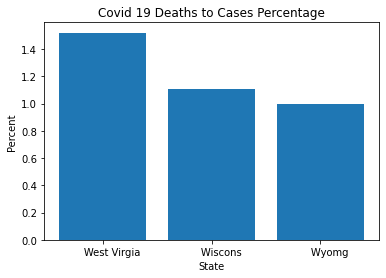

In [17]:
# CS390Z - Introduction to Data Minining - Fall 2021
# Instructor: Thyago Mota
# Description: Data Visualization

x9 = []
y9 = []
for i in range(48, 51):
    x9.append(final_df["State"][i])
    y9.append(final_df["% of Deaths to Cases"][i])
plt.ylabel("Percent")
plt.xlabel("State")
plt.title("Covid 19 Deaths to Cases Percentage")
plt.bar(x9, y9)

### Boxplots


{'whiskers': [<matplotlib.lines.Line2D at 0x7fd34bc24d00>,
 'caps': [<matplotlib.lines.Line2D at 0x7fd34bc333a0>,
 'boxes': [<matplotlib.lines.Line2D at 0x7fd34bc249a0>],
 'medians': [<matplotlib.lines.Line2D at 0x7fd34bc33910>],
 'fliers': [<matplotlib.lines.Line2D at 0x7fd34bc33c40>],
 'means': []}

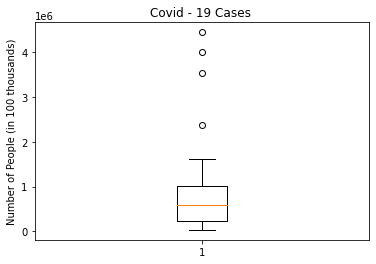

In [18]:
# CS390Z - Introduction to Data Minining - Fall 2021
# Instructor: Thyago Mota
# Description: Data Visualization

plt.title("Covid - 19 Cases ")
plt.ylabel("Number of People (in 100 thousands)")
plt.boxplot(final_df["Cases"])

{'whiskers': [<matplotlib.lines.Line2D at 0x7fd34b76bee0>,
 'caps': [<matplotlib.lines.Line2D at 0x7fd34b6c3d00>,
 'boxes': [<matplotlib.lines.Line2D at 0x7fd34b746d30>],
 'medians': [<matplotlib.lines.Line2D at 0x7fd34b7f83d0>],
 'fliers': [<matplotlib.lines.Line2D at 0x7fd34b7f89d0>],
 'means': []}

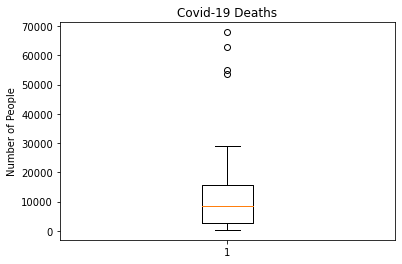

In [19]:
# CS390Z - Introduction to Data Minining - Fall 2021
# Instructor: Thyago Mota
# Description: Data Visualization

plt.title("Covid-19 Deaths")
plt.ylabel("Number of People")
plt.boxplot(final_df["Deaths"])

{'whiskers': [<matplotlib.lines.Line2D at 0x7fd34bc4ba60>,
 'caps': [<matplotlib.lines.Line2D at 0x7fd34b993400>,
 'boxes': [<matplotlib.lines.Line2D at 0x7fd34bc4baf0>],
 'medians': [<matplotlib.lines.Line2D at 0x7fd34b998490>],
 'fliers': [<matplotlib.lines.Line2D at 0x7fd34b9989a0>],
 'means': []}

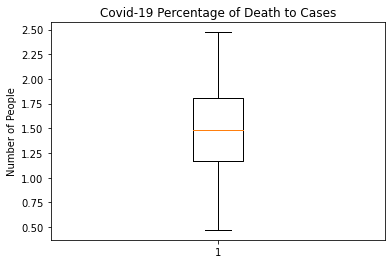

In [20]:
# CS390Z - Introduction to Data Minining - Fall 2021
# Instructor: Thyago Mota
# Description: Data Visualization

plt.title("Covid-19 Percentage of Death to Cases")
plt.ylabel("Number of People")
plt.boxplot(final_df["% of Deaths to Cases"])

### There are some outliers present in Deaths and Cases. I am assuming these outliers have either highly or lowly population. Places like Alaska vs New York would have lower and higher cases, respectively. 

# HeatMap --> Correlation of Variables Visualization

In [ ]:
# CS390Z - Introduction to Data Minining - Fall 2021
# Instructor: Thyago Mota
# Description: Data Visualization


final_df.corr()

<AxesSubplot:>

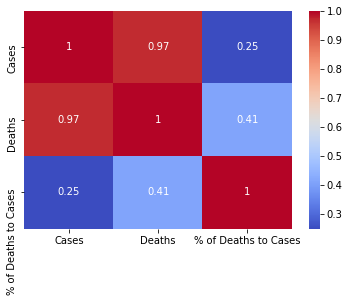

In [22]:
# CS390Z - Introduction to Data Minining - Fall 2021
# Instructor: Thyago Mota
# Description: Data Visualization
sns.heatmap(final_df.corr(), cmap = "coolwarm", annot = True)

### Cases and Deaths are highly coorelated (they have a strong relationship with each other (as expected). Oddly enough, the column "% of Deaths to Cases" is not as coorelated to deaths or cases, which seems off. 